# 1. Time Series Analysis 
## Abdullah Karasan

Techniques that we apply varies depending on the dataset at our disposal. The analysis of data with different time points leads to unique treatment in statistical modeling. In finance, having time dimension in the data is not a rare rather very common issues and these type of data should be treated with cautious.

The statistical modeling approach by which we try to address the statistical issues considering the time dimension is referred to as `time series analysis`. For instance, stock prices, inflation, economic growth, dividend payment, interest rates, weather data are just a few cases in which data has time dimension.

The primary motivation in time series analysis lies in the correlation in time. More specifically, as the current value is to some degree dependent on its past values. So, the correlation between successive time points can unveil the dependence structure of this time-based relationship.

 We are about the discuss in-depth time series analysis. Get ready and take a deep breath because if you are a financial modeling enthusiast, I bet this will be your reference course.

Suppose that we have random variables denoted as $x_t$, $x_{t-1}$, $x_{t-2}$ where $x_t$ denotes realization of z at time t. If current value of x ($x_t$) depends on the lag values ($x_{t-1}$, $x_{t-2}$ and so on), we are talking about time series modeling.

There are two important concepts about time series modeling: **Stationary** and **Random Walk**

## 1.1. Stationary

The basic assumption in modeling is that $X_i$ should be independent from other realizations. If independence assumption does not hold, the result of the model cannot be reliable any more. Stationary is a way to model the dependent structure that we have in time-dependent data. For instance, current stock price is somewhat related to the previous prices of the stock.

Stationary can be divided into two as:
   * Strictly Stationary
   * Weakly Stationary

`Strictly stationary` time series occurs when {$x_{t1}$, $x_{t2}$,...,$x_{tk}$} is identical to the shifted set of {$x_{t1+h}$, $x_{t2+h}$,...,$x_{tk+h}$}

`Weakly stationary` time series is satisfied when:
    * Mean of a series is constant over time
    * The variance of the series should not a be a function of time. In other words, covariance function, \gamma(s,t) depends on |s-t| only.

In time series, it is common to have non-stationary data and taking difference is a way to make non-stationary data a stationary one. Taking first difference is nothing but taking difference of two successive values. 

$$\Delta x=x_t-x_{t-1}$$

To show how it take the first difference in Python, I use the Apple stock price gathered from yahoo-finance. By doing that, we are able to observe the changes between stationary and non-stationary data.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [138]:
stock = 'BLK'
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,4,9)
blk_close = yf.download(stock,start=start,end = end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 downloaded


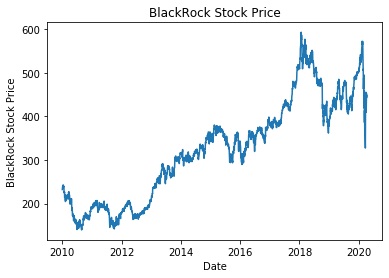

In [7]:
plt.plot(blk_close)
plt.title('BlackRock Stock Price')
plt.ylabel('BlackRock Stock Price')
plt.xlabel('Date')
plt.show()

As we can observe, there is a real trend in Apple's stock price. Specifically, in 2010, it has a value under $\$50$ and, towards the beginning of 2020, it hit $250. Thus, it is not stationary.

Another way of detecting the non-stationarity is to apply `Autocorrelation Function`. Autocorrelation implies serial dependence. Precisely, it occurs when a time series is highly correlated with its lagged version. It is shown by acf plot. The more height of the bar in the acf plot, the more dependence a series has.

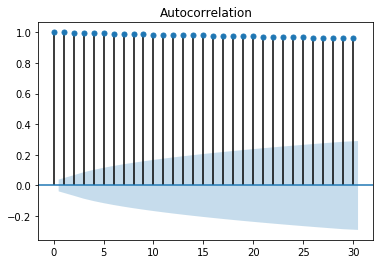

In [8]:
sm.graphics.tsa.plot_acf(blk_close,lags=30)
plt.show()

The `acf` plot indicates that acf is slowly decaying, which is an indicator of non-stationarity. 

Let's see what happens when the first difference of the stock price is taken. `.diff()` function takes the first difference in Python.

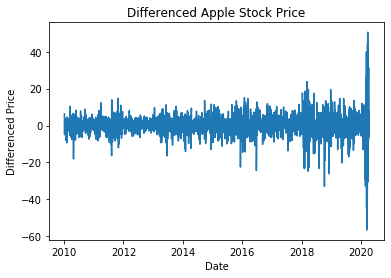

In [9]:
plt.plot(blk_close.diff())
plt.title('Differenced Apple Stock Price')
plt.ylabel('Differenced Price')
plt.xlabel('Date')
plt.show()

After taking the first difference, it is quite obvious that the series fluctuates around its mean and it is referred to as weakly stationary.

## 1.2. Random Walk

Random walk is basically a process in which series fluctuates around its mean. Differently, a random walk is a process by which randomly-moving objects wander away from where they started. If we have zero intercept term, the simple random walk model is what we have:

$$x_t=x_{t-1}+e_t$$

So, the path of $x_t$ is determined by $x_{t-1}$ and $e_t$ which is completely random.

Let's generate random number from standard normal distribution via `.randn()`. Standard normal distribution is a special version of normal distribution with a mean of 0 and a standard deviation of 1. Let's generate 100 normally distributed data:

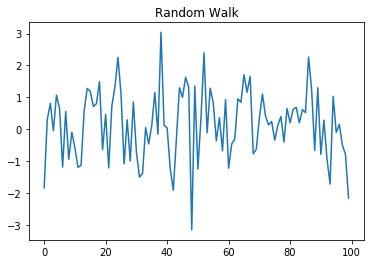

In [10]:
random_walk=np.random.randn(100)

plt.plot(random_walk)
plt.title('Random Walk')
plt.show()

## 1.3. Time Series Models

After briefly visiting the theory of time series, it is time to discuss the main time series models, which are:

    * Moving Average
    * Autoregressive Model
    * Autoregressive Moving Average
    * Autoregressive Integrated Moving Average
    * Seasonal Autoregressive Integrated Moving Average


### 1.3.1. Moving Average Model

`Moving average`model tries to capture the time series dynamics simply by error terms. Let $e_t$ is a normally distributed term, meaning that it is identically and independently distributed (iid). So, unlike AR, MA is alway stationary.

MA(1) can be take the following form:

$$ X_{t} = \alpha + \beta \epsilon_{t-1} + \epsilon_{t} $$



Similarly, the $q_{th}$ order moving average model can be shown as:

$$ X_{t} = \alpha + \beta_1 \epsilon_{t-1} +\cdots+\beta_q \epsilon_{t-q} +\epsilon_{t} $$

Modeling a time series with MA in Python is not very different from modeling AR. The only difference is the location of the order (lag) parameter. The first parameter of order represent the number of lag values of AR whereas the second input of order in ARMA defines the number of lag values in modeling MA. A quick note: As the MA works with the windows, less order number might result in bad prediction.

Let's decide the best-fitting MA model. But before moving forward, I need to calculate the first difference and drop the missing values to not to get `exog contains inf or nans` error.

In [11]:
diff_blk_close=blk_close.diff().dropna()

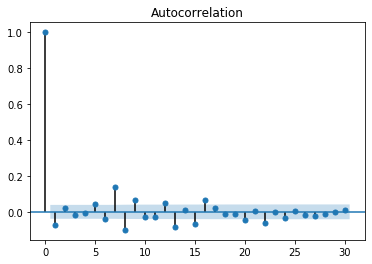

In [12]:
sm.graphics.tsa.plot_acf(diff_blk_close,lags=30)
plt.show()

ACF plot for `BlackRock` stock price indicates a pattern typical for situations where an MA(8) model may be useful. There are three statistically significant “spikes” at lags 1,7 and 8 followed by non-significant values for other lags.

In [13]:
moving_average_blk=diff_blk_close.rolling(window=8).mean()

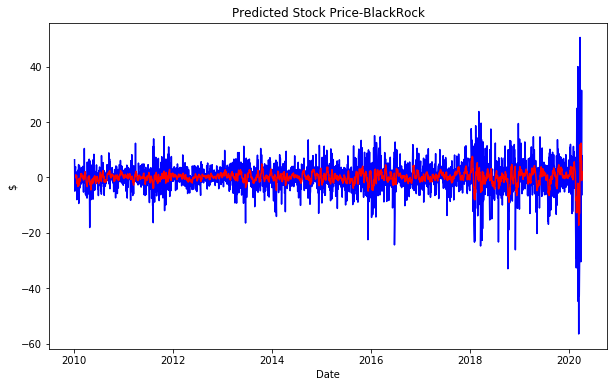

In [14]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close.loc[start:end].index, diff_blk_close.loc[start:end], label='Stock Price',c='b')
plt.plot(moving_average_blk.loc[start:end].index, moving_average_blk.loc[start:end], label = 'MA',c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel(ylabel='$')
plt.show()

### 1.3.2. Autoregressive Model

`Autoregressive model` (AR) is one of the most basic models in time series. As its name suggest, we regress the current value of a series over its lagged values. So, it is based on the idea that current values of series $x_t$ can be accounted for as a function of past values.

Different lag values can be employed to explain the current value of $x_t$. Symbolically, AR(p) denotes that $x_t$ is explained by p past values of $x_t$.

For the sake of simplicity, AR(1) model can be represented by the following equation:

$$ X_{t} = \alpha + \beta X_{t-1} + \epsilon $$

In order to model AR in python, we use `AutoReg` library. But the question is can we define the optimal lag number? To do that we have two different ways to follow:
* Partial Autocorrelation Function
* Akaike Information Criteria

Partial Autocorrelation Function (PACF) is another method to examine the relationship between ${X_t}$ and ${X_{t-p}}, p\in \mathbb{Z}$. ACF is considered as a useful tool in MA(q) model sumply beacuse it lets us define the cut-off point for optimal lag. ACF is, however, not working well with AR(p) process.

PACF provides information on correlation between current value of a time series and its lagged values controlling for the other correlations. Mathematically,

$$
\hat \rho(h)= \frac{\text{Cov}(X_t,X_{t-h}|X_{t-1},X_{t-2}\ldots X_{t-h-1})}{\sqrt{\text{Var}(X_t|X_{t-1},X_{t-2},\ldots, X_{t-h-1})\text{Var}(X_{t-h}|X_{t-1},X_{t-2},\ldots, X_{t-h-1})}}
$$

But the question is how do we know that the optimal lag number is 1? We cannot know that without further analysis. This analysis is called `Akaike Information Criteria (AIC)`.

`AIC` is used to detect the best-fitting model. Mathematically speaking, 

$$
AIC=-2ln(\text{Maximum Likelihood})+2d
$$



where d is the total number of parameters. The last term, 2d in the equation aims at reducing the risk of overfitting. It is also called as `penalty term` by which I can filter out the unnecessary redundancy in the model.

Let's decide the best-fitting AR model with AIC using `PACF`.

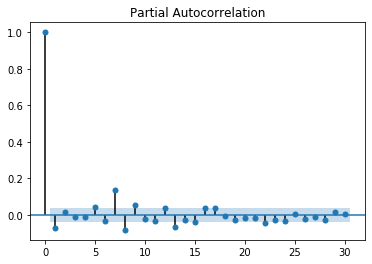

In [18]:
sm.graphics.tsa.plot_pacf(diff_blk_close,lags=30)
plt.show()

The PACF shows some spikes at lag 1 and 6, which can be interpreted to mean that a six-order autoregression may be warranted since there are notable partial autocorrelations for lags 1 and six. 

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [19]:
ar_blk = AutoReg(diff_blk_close,lags=8)
ar_fitted_blk = ar_blk.fit()

In [20]:
ar_predictions_blk= ar_fitted_blk.predict(start=len(diff_blk_close[:-50]), 
                                   end=len(diff_blk_close[:-50])+len(diff_blk_close[-50:])-1,dynamic=False)

In [21]:
for i in range(len(ar_predictions_blk)):
    print('=='*25)
    print('predicted values:{:.4f} & actual values:{:.4f}' .format(ar_predictions_blk[i],diff_blk_close[-50:][i]))

predicted values:0.0092 & actual values:6.5200
predicted values:-0.1055 & actual values:3.2000
predicted values:-0.3876 & actual values:-12.3400
predicted values:0.4952 & actual values:2.7300
predicted values:0.3138 & actual values:5.1600
predicted values:-0.0343 & actual values:8.2400
predicted values:-0.4280 & actual values:11.1900
predicted values:-1.2482 & actual values:1.0700
predicted values:0.5956 & actual values:5.3600
predicted values:-0.3725 & actual values:9.3400
predicted values:-0.4211 & actual values:2.0400
predicted values:0.1778 & actual values:-3.9300
predicted values:-0.1422 & actual values:-2.6100
predicted values:0.2721 & actual values:-1.1300
predicted values:0.3435 & actual values:7.2600
predicted values:-0.6107 & actual values:-5.1500
predicted values:0.3632 & actual values:-9.9200
predicted values:0.6228 & actual values:-29.0000
predicted values:1.9577 & actual values:-22.0000
predicted values:1.6202 & actual values:2.4700
predicted values:-0.4346 & actual value

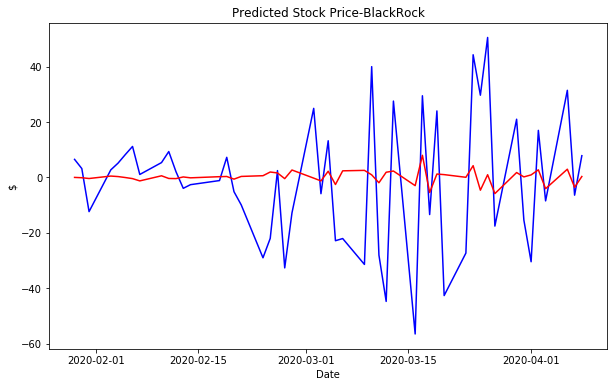

In [22]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close[-50:], label='Actual Stock Price',c='b')
plt.plot(ar_predictions_blk,c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

The above-given plot shows how AR predicts. The blue line indicates the closing price of Apple and the red line represents the prediction based on AR and it turns out the prediction performance is not that good.

### 1.3.3. Autoregressive Moving Average

Thus far, we have, first, tried to model a series by regressing current value of it on its past values , which is referred to as AR model. Then, error terms are taken into account to model a series, which is called MA. How about combining these two? 

Here we have a model called `ARMA` combining both autoregressive and moving average components. So, we have 2 parameters to define: order of AR component p and order of MA component q.

The ARMA model takes the following form when p and q is 1:

$$ X_{t} = \alpha + \beta_{1} X_{t-1} + \beta_{2} \epsilon_{t-1} + \epsilon_{t} $$

Let's make some practice and we need to find the optimal number of lags.

In [23]:
from statsmodels.tsa.arima_model import ARMA
import itertools
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [24]:
p=q=range(0,6)
pq=list(itertools.product(p,q))
arma_results_blk=[]
for param_set in pq:
    try:
        arma_blk=ARMA(diff_blk_close.values,order=param_set)
        arma_fitted_blk = arma_blk.fit()
        arma_results_blk.append(arma_fitted_blk.aic)
        print('=='*25)
        print('ARMA parameters are:{} & AIC value is:{}'.format(param_set,  arma_fitted_blk.aic))
    except:
        continue
print('**'*25)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'.format(pd.DataFrame(arma_results_blk).where(pd.DataFrame(arma_results_blk).T.notnull().all()).min()[0],pq[arma_results_blk.index(min(arma_results_blk))]))

ARMA parameters are:(0, 0) & AIC value is:16401.87361845525
ARMA parameters are:(0, 1) & AIC value is:16391.08896716049
ARMA parameters are:(0, 2) & AIC value is:16392.08167923287
ARMA parameters are:(0, 3) & AIC value is:16393.29251794607
ARMA parameters are:(0, 4) & AIC value is:16395.28450767827
ARMA parameters are:(0, 5) & AIC value is:16394.048953221987
ARMA parameters are:(1, 0) & AIC value is:16390.620611838065
ARMA parameters are:(1, 1) & AIC value is:16391.798359808174
ARMA parameters are:(1, 2) & AIC value is:16385.783361985672
ARMA parameters are:(1, 3) & AIC value is:16382.46144880521
ARMA parameters are:(1, 4) & AIC value is:16377.592153753594
ARMA parameters are:(1, 5) & AIC value is:16371.981350638205
ARMA parameters are:(2, 0) & AIC value is:16391.89381847649
ARMA parameters are:(2, 1) & AIC value is:16383.753927934402
ARMA parameters are:(2, 2) & AIC value is:16318.712274369696
ARMA parameters are:(2, 3) & AIC value is:16319.776836789417
ARMA parameters are:(2, 4) & AI

In [25]:
arma_blk = ARMA(diff_blk_close,order=(4, 4))
arma_fitted_blk= arma_blk.fit()

In [26]:
arma_predictions_blk= arma_fitted_blk.predict(start=len(diff_blk_close[:-50]), 
                                   end=len(diff_blk_close[:-50])+len(diff_blk_close[-50:])-1,dynamic=False)

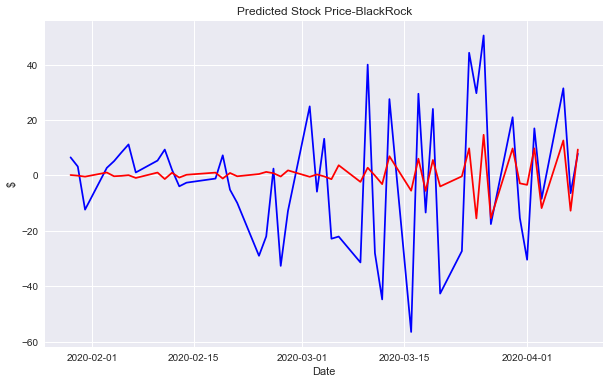

In [27]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close[-50:], label='Actual Stock Price',c='b')
plt.plot(arma_predictions_blk,c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

### 1.3.4. Autoregressive Integrated Moving Average

As we discuss the stationary assumption should be satisfied in modeling a time series. In the presence of non-stationarity, first difference needs to be taken before running AR, MA, and ARMA. However, it is not the case for `Autoregressive Integrated Moving Average`(ARIMA) in that we have `Integrated` term. So, before running ARIMA, all we need to do specify the degree of difference along with two other parameters borrowed from ARMA(p,q). In a nutshell, ARIMA(p,d,q) has three parameters and one of is for making a series stationary.

The first and third parameters of ARIMA is coming from AR and MA components, respectively and as we can guess the second parameter represents the order of difference.

To use ARIMA, we again use `statsmodels` but now import `ARIMA` library:

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [141]:
p=q=range(0,6)
d=range(0,3)
pdq=list(itertools.product(p,d,q))
arima_results_blk=[]
for param_set in pdq:
    try:
        arima_blk=ARIMA(blk_close,order=param_set)
        arima_fitted_blk = arima_blk.fit()
        arima_results_blk.append(arima_fitted_blk.aic)
        print('=='*25)
        print('ARIMA parameters are:{} & AIC value is:{}'.format(param_set,  arima_fitted_blk.aic))
    except:
        continue
print('**'*25)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'.format(pd.DataFrame(arima_results_blk).where(pd.DataFrame(arima_results_blk).T.notnull().all()).min()[0],pdq[arima_results_blk.index(min(arima_results_blk))]))

ARIMA parameters are:(0, 0, 0) & AIC value is:31872.20430545216
ARIMA parameters are:(0, 0, 1) & AIC value is:28439.6691673468
ARIMA parameters are:(0, 0, 2) & AIC value is:25806.89350002483
ARIMA parameters are:(0, 0, 3) & AIC value is:23699.84057119896
ARIMA parameters are:(0, 0, 4) & AIC value is:22501.32779997748
ARIMA parameters are:(0, 0, 5) & AIC value is:21228.381658655795
ARIMA parameters are:(0, 1, 0) & AIC value is:16401.87361845525
ARIMA parameters are:(0, 1, 1) & AIC value is:16391.08896716049
ARIMA parameters are:(0, 1, 2) & AIC value is:16392.08167923287
ARIMA parameters are:(0, 1, 3) & AIC value is:16393.29251794607
ARIMA parameters are:(0, 1, 4) & AIC value is:16395.28450767827
ARIMA parameters are:(0, 1, 5) & AIC value is:16394.048953221987
ARIMA parameters are:(0, 2, 0) & AIC value is:18363.902907292257
ARIMA parameters are:(0, 2, 1) & AIC value is:16406.342031631124
ARIMA parameters are:(0, 2, 2) & AIC value is:16395.700652655494
ARIMA parameters are:(0, 2, 3) & AIC

ARIMA parameters are:(3, 2, 5) & AIC value is:16318.814149016693
ARIMA parameters are:(4, 0, 0) & AIC value is:16406.922218897824
ARIMA parameters are:(4, 0, 1) & AIC value is:16392.06263432174
ARIMA parameters are:(4, 0, 2) & AIC value is:16333.463228350109
ARIMA parameters are:(4, 0, 3) & AIC value is:16330.889447658488
ARIMA parameters are:(4, 0, 4) & AIC value is:16327.605763067484
ARIMA parameters are:(4, 0, 5) & AIC value is:16327.60668163406
ARIMA parameters are:(4, 1, 0) & AIC value is:16395.171533826746
ARIMA parameters are:(4, 1, 1) & AIC value is:16369.647156491665
ARIMA parameters are:(4, 1, 2) & AIC value is:16314.498652497292
ARIMA parameters are:(4, 1, 3) & AIC value is:16317.588361045673
ARIMA parameters are:(4, 1, 4) & AIC value is:16305.472543572701
ARIMA parameters are:(4, 2, 0) & AIC value is:16836.811790711083
ARIMA parameters are:(4, 2, 1) & AIC value is:16399.79192612527
ARIMA parameters are:(4, 2, 2) & AIC value is:16374.311471847243
ARIMA parameters are:(4, 2, 

In [142]:
arima_blk = ARIMA(blk_close,order=(4,1,4))
arima_fitted_blk = arima_blk.fit()

In [143]:
arima_predictions_blk= arima_fitted_blk.predict(start=len(blk_close[:-50]), 
                                   end=len(blk_close[:-50])+len(blk_close[-50:])-1,dynamic=False)

In [144]:
arima_predictions_blk=pd.DataFrame(arima_predictions_blk)
arima_predictions_blk.index=blk_close[-50:].index

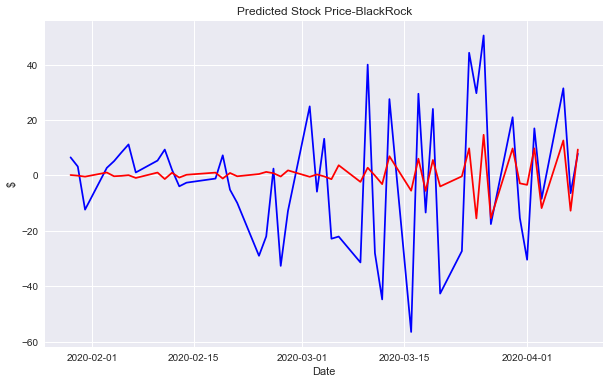

In [146]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close[-50:], label='Actual Stock Price',c='b')
plt.plot(arima_predictions_blk,c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

### 1.3.5. SARIMA

In [172]:
blk_monthly_close = yf.download(stock,start=start,end = end, interval='1mo')['Close'].dropna()

[*********************100%***********************]  1 of 1 downloaded


In [173]:
from pmdarima.arima import auto_arima

In [209]:
auto_arima_fitted_blk=auto_arima(blk_monthly_close,d=1,D=1,m=12,error_action='ignore',suppress_warnings=True,
                            stepwise=True,seasonal=True,n_jobs=-1,random_state=20,random=True)

In [210]:
auto_arima_fitted_blk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  123
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -510.662
Date:                            Mon, 03 Aug 2020   AIC                           1033.323
Time:                                    14:41:28   BIC                           1049.526
Sample:                                         0   HQIC                          1039.895
                                            - 123                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0747      0.042     -1.788      0.074      -0.157       0.007
ar.L1         -0.1930      0.088     -2.181      0.029      -0.366      -0.020
ma.L1         -0.9999     11.140     -0.090      0.928     -22.834      20.835
ar.S.L12      -0.4067      0.127     -3.213      0.001      -0.655      -0.159
ma.S.L12      -0.4839      0.157     -3.080      0.002      -0.792      -0.176
sigma2       543.3229   6033.427      0.090      0.928   -1.13e+04    1.24e+04
===================================================================================
Ljung-Box (Q):                       25.00   Jarque-Bera (JB):                 6.39
Prob(Q):                              0.97   Prob(JB):                         0.04
Heteroskedasticity (H):               5.40   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [211]:
prediction_sarima_blk=auto_arima_fitted_blk.predict(n_periods=50)

In [212]:
prediction_sarima_blk=pd.DataFrame(prediction_sarima_blk)
prediction_sarima_blk.index=diff_blk_close[-50:].index

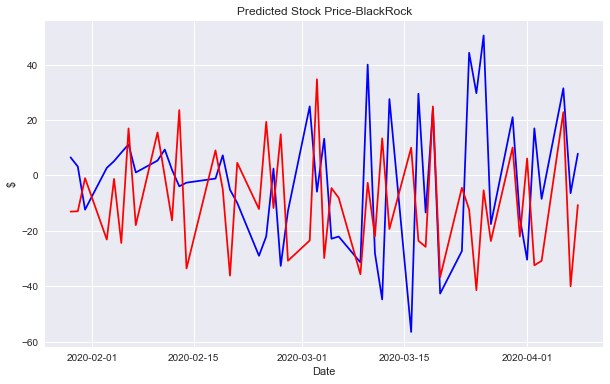

In [213]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close[-50:], label='Actual Stock Price',c='b')
plt.plot(prediction_sarima_blk,c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel('$')
#plt.savefig('images/ar.png')
plt.show()

# Conclusion

This lesson covers some of the fundamental ways a financial analyst can deal with time. We cover some theory about processes and a concept called randomness. Then we cover some ways to transform our current tool set, particularly linear modeling, to handle time. Lastly, we introduce the classic model for time series analyses such as AR, MA, ARMA, ARIMA, and SARIMA.